<a href="https://colab.research.google.com/github/wayoutl1/Analysis/blob/main/H_M_analyse_vizual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
plt.style.use('dark_background')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# New Section

In [ ]:
df_customers = pd.read_csv('E:\Ejoy\customers_1.txt', sep = ',')
df_transactions = pd.read_csv('E:\Ejoy\jjtrans.txt', sep = ',')
df_articles = pd.read_csv('E:\Ejoy\jjart.txt', sep = ',')

In [ ]:
df_articles.head()

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,OP T-shirt (Idro),Bra,Underwear,Solid,White,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
for i in df_articles.columns:
    if type(df_articles[i][0]) == str:
        print(i,':', len(df_articles[i].unique()))

prod_name : 45875
product_type_name : 131
product_group_name : 19
graphical_appearance_name : 30
colour_group_name : 50
index_name : 10
index_group_name : 5
section_name : 56
garment_group_name : 21
detail_desc : 43405


In [ ]:
cat_index_name = df_articles.index_name.value_counts()

<AxesSubplot:xlabel='Count', ylabel='index_name'>

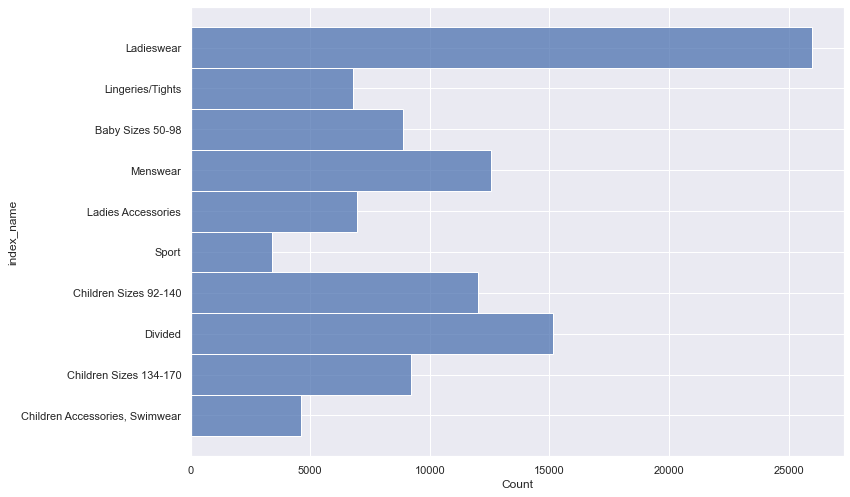

In [ ]:
sns.histplot(data = df_articles, y = 'index_name')

In [ ]:
df_articles[['garment_group_name', 'index_group_name']]

,garment_group_name,index_group_name
0,Jersey Basic,Ladieswear
1,Jersey Basic,Ladieswear
2,Jersey Basic,Ladieswear
3,"Under-, Nightwear",Ladieswear
4,"Under-, Nightwear",Ladieswear
...,...,...
105537,Socks and Tights,Menswear
105538,Jersey Fancy,Ladieswear
105539,Jersey Fancy,Ladieswear
105540,Accessories,Divided


<AxesSubplot:xlabel='Count', ylabel='garment_group_name'>

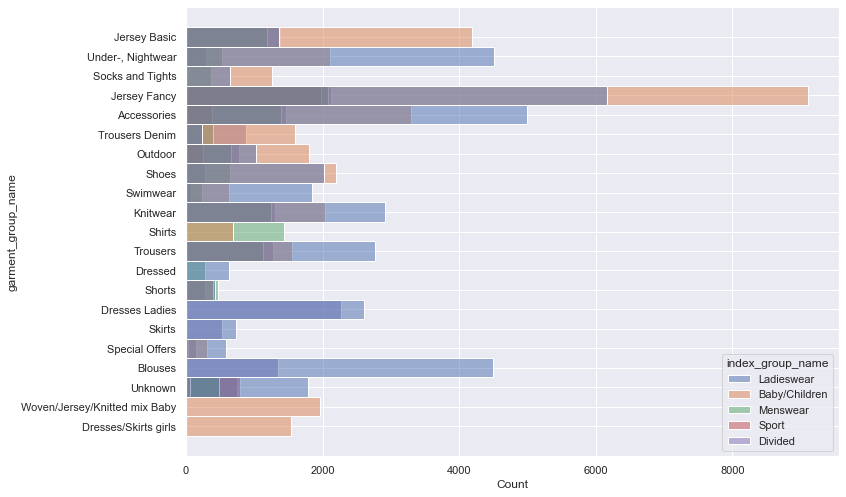

In [ ]:
sns.histplot( data = df_articles, y = 'garment_group_name', hue = 'index_group_name')

In [ ]:
df_articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [ ]:
pd.options.display.max_rows = None
df_articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

<AxesSubplot:xlabel='product_type_name'>

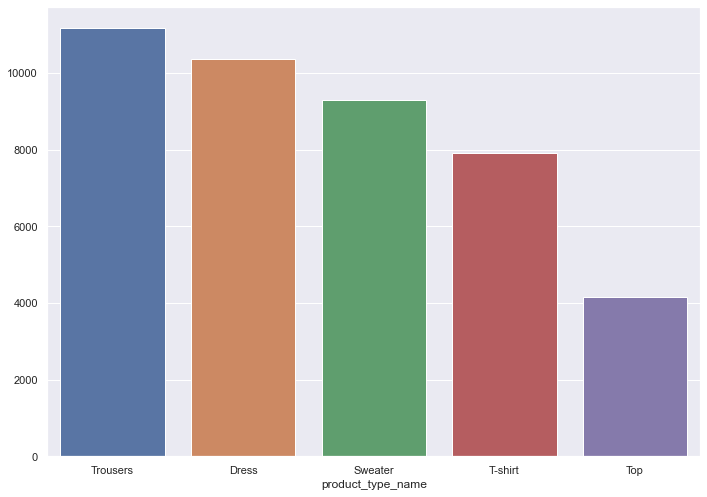

In [ ]:
top_product = df_articles.groupby(['product_type_name']).count()['article_id'].sort_values(ascending=False).head(5)
sns.barplot(x = top_product.index, y = top_product.values)

<AxesSubplot:xlabel='product_group_name'>

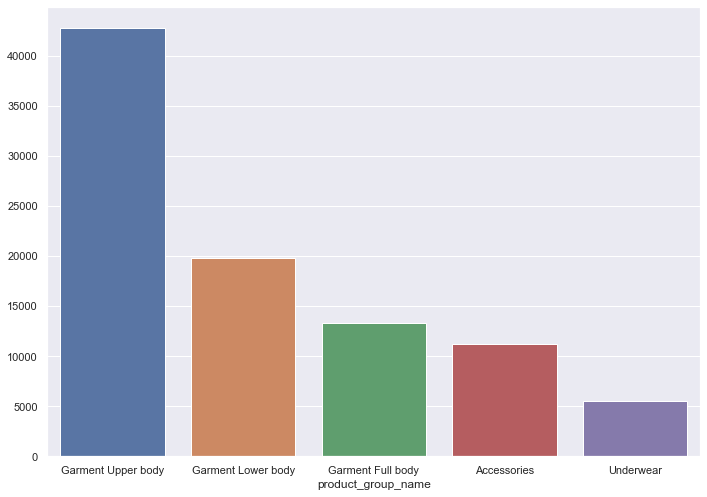

In [ ]:
top_category = df_articles.groupby(['product_group_name']).count()['article_id'].sort_values(ascending=False).head(5)
sns.barplot(x=top_category.index, y=top_category.values)

<AxesSubplot:xlabel='graphical_appearance_name'>

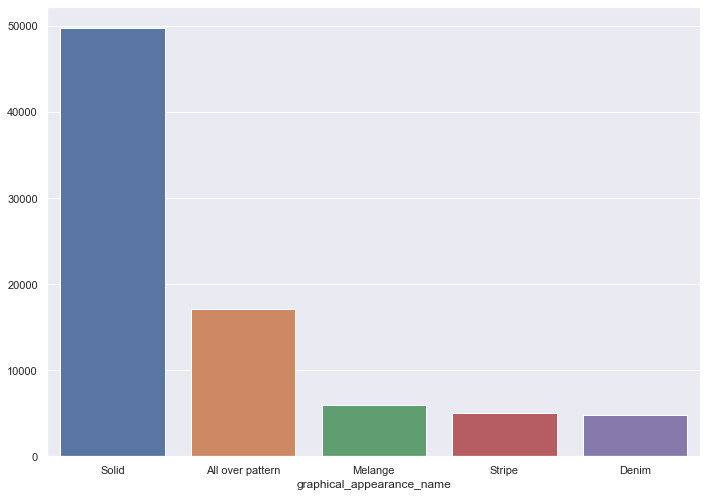

In [ ]:
graph_group = df_articles.groupby(['graphical_appearance_name']).count()['article_id'].sort_values(ascending=False).head(5)
sns.barplot(x=graph_group.index, y=graph_group.values)

<AxesSubplot:xlabel='colour_group_name'>

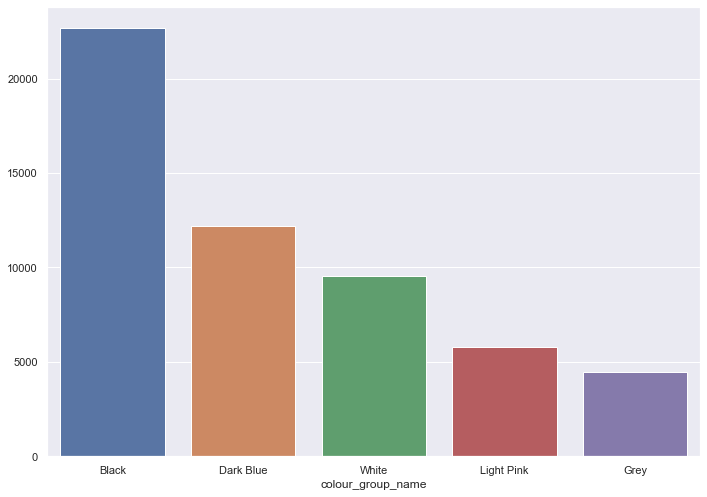

In [ ]:
color_group = df_articles.groupby(['colour_group_name']).count()['article_id'].sort_values(ascending=False).head(5)
sns.barplot(x=color_group.index, y=color_group.values)

In [ ]:
df_customers.head()

,customer_id,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
df_customers['customer_id'].shape[0] - df_customers['customer_id'].nunique()

0

In [ ]:
df_customers['postal_code'].shape[0] - df_customers['postal_code'].nunique()
df_customers.groupby(['postal_code'], as_index=False).count().sort_values('customer_id', ascending=False).head(5)

,postal_code,customer_id,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,41,156,156,155


In [ ]:
df_postal = df_customers.groupby(['postal_code'], as_index=False).count().sort_values('customer_id', ascending=False).head(1)
np.array(df_postal.postal_code)

array(['2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'],
      dtype=object)

In [ ]:
df_customers[df_customers['postal_code'] == '2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head()

,customer_id,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,ACTIVE,NONE,31.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


<AxesSubplot:xlabel='age', ylabel='Count'>

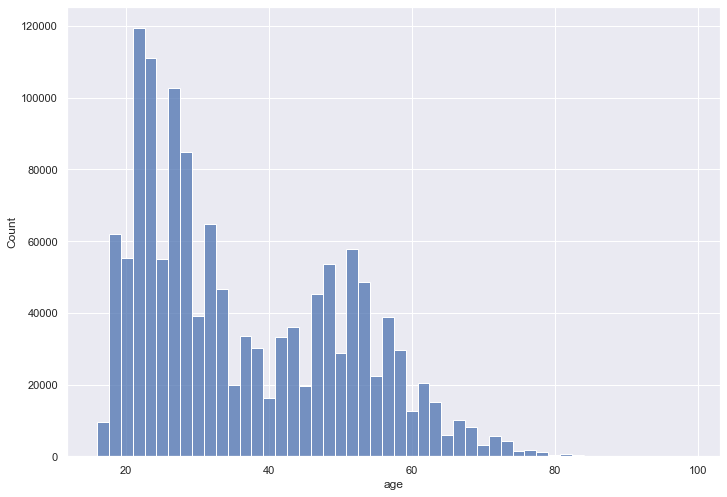

In [ ]:
sns.histplot(data = df_customers.age, bins = 50)

In [ ]:
df_customers.fashion_news_frequency.unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

([<matplotlib.patches.Wedge at 0x15192a6ca48>,
 [Text(1.0999979554822665, 0.0021208335233186613, 'Monthly'),
  Text(-0.5074942437483383, 0.975935239942847, 'Never'),
  Text(0.5056115525619982, -0.9769119499299033, 'Regularly')])

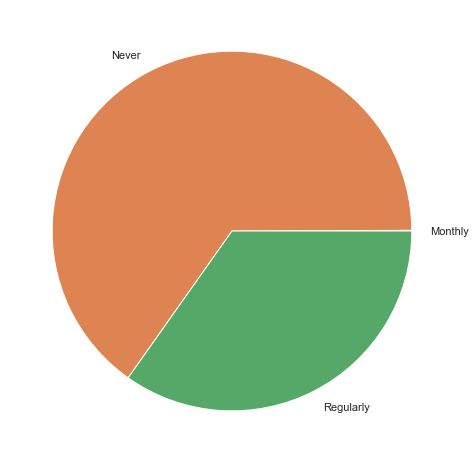

In [ ]:
df_customers.loc[~df_customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'Never'
news_freq = df_customers.groupby(['fashion_news_frequency']).count()['customer_id']
plt.pie(news_freq, labels = news_freq.index)

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)
df_transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

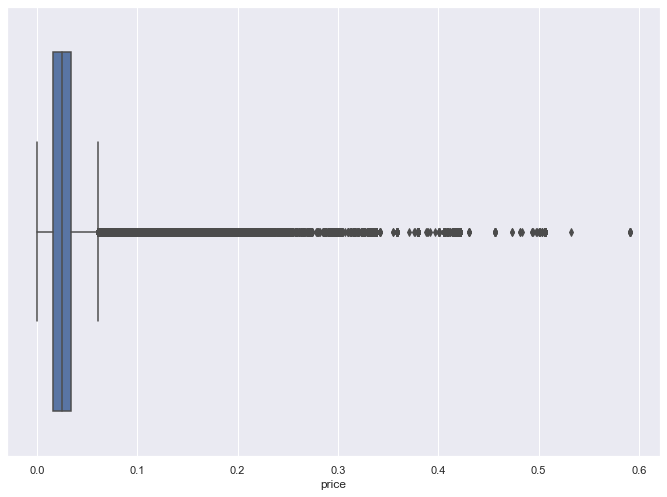

In [ ]:
sns.boxplot(data=df_transactions, x='price')

In [ ]:
trans_buyid = df_transactions.groupby(['customer_id']).count()
trans_buyid.sort_values('price', ascending=False)['price'].head()

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
Name: price, dtype: int64

In [ ]:
articles_for_merge = df_articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_for_merge.head()

,article_id,prod_name,product_type_name,product_group_name,index_name
0,108775015,Strap top,Vest top,Garment Upper body,Ladieswear
1,108775044,Strap top,Vest top,Garment Upper body,Ladieswear
2,108775051,Strap top (1),Vest top,Garment Upper body,Ladieswear
3,110065001,OP T-shirt (Idro),Bra,Underwear,Lingeries/Tights
4,110065002,OP T-shirt (Idro),Bra,Underwear,Lingeries/Tights


In [ ]:
articles_for_merge = df_transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')
articles_for_merge

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2018-09-20,Atlanta Push Body Harlow,Underwear body,Underwear,Lingeries/Tights
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2018-09-20,Rae Push (Melbourne) 2p,Bra,Underwear,Lingeries/Tights
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2018-09-20,Inca Jumper,Sweater,Garment Upper body,Divided
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
...,...,...,...,...,...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2020-09-22,POPPY PU SHIRT DRESS,Dress,Garment Full body,Divided
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2020-09-22,FENNEL SHIRT DRESS,Unknown,Unknown,Divided
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,2020-09-22,Winter shopper,Bag,Accessories,Ladies Accessories
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,2020-09-22,Class Aligator Ring Pack,Ring,Accessories,Ladies Accessories


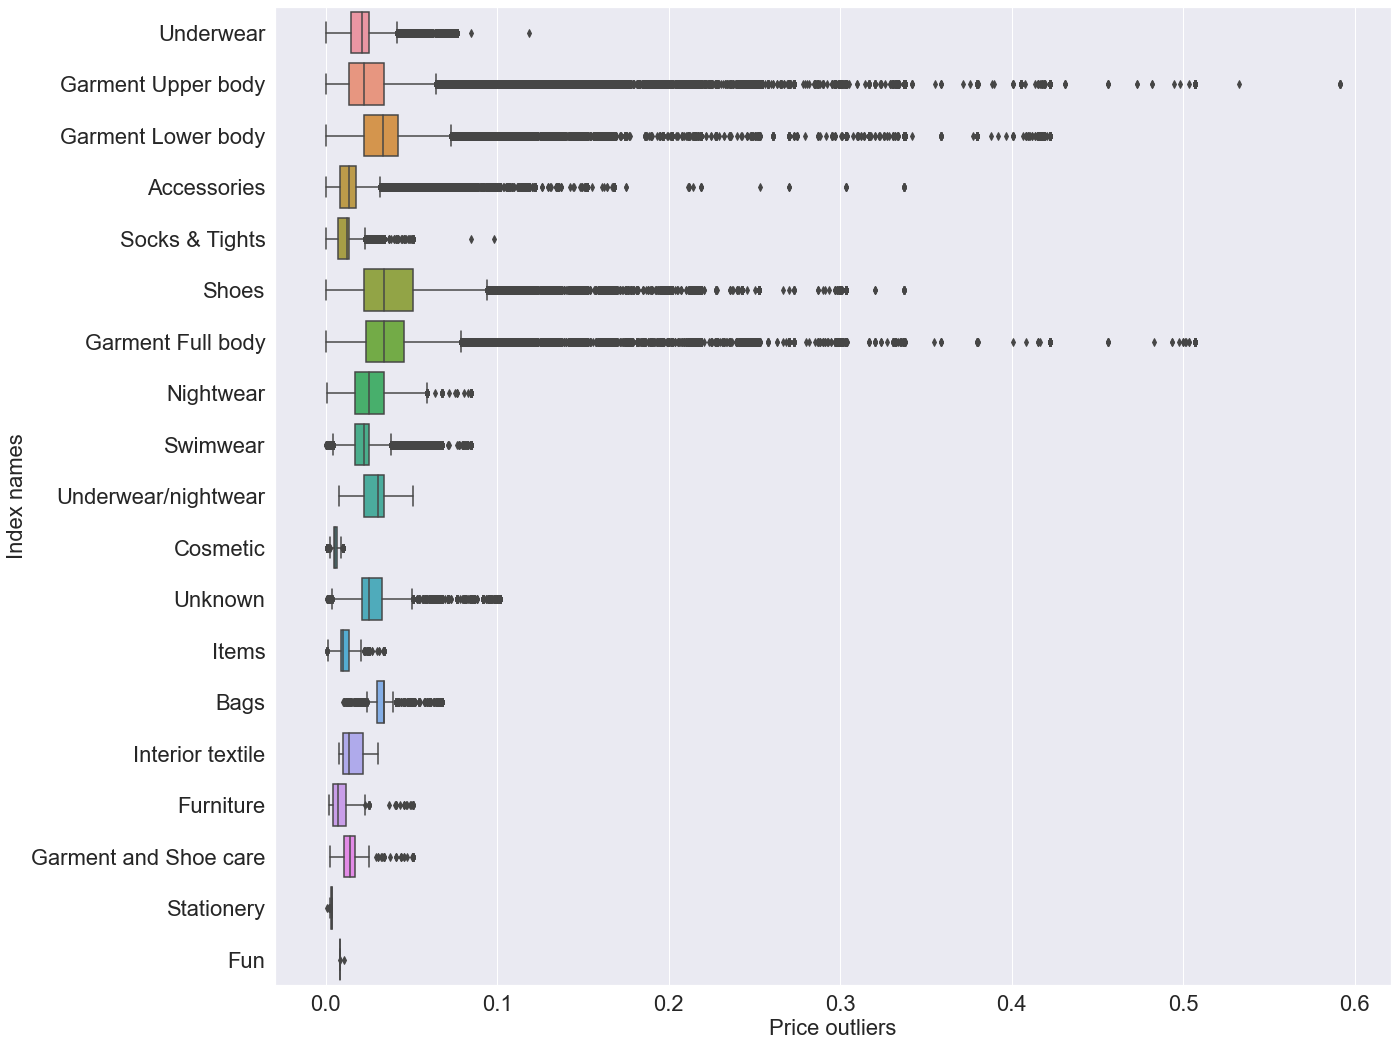

In [ ]:
f, ax = plt.subplots(figsize=(20,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize = 22)
ax.set_ylabel('Index names', fontsize = 22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
plt.show()

In [ ]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
articles_index = articles_index.sort_values('price')
articles_index

,price
product_group_name,
Stationery,0.003205
Cosmetic,0.005848
Fun,0.008885
Furniture,0.009591
Items,0.011337
Socks & Tights,0.011391
Accessories,0.015563
Interior textile,0.016449
Garment and Shoe care,0.017484


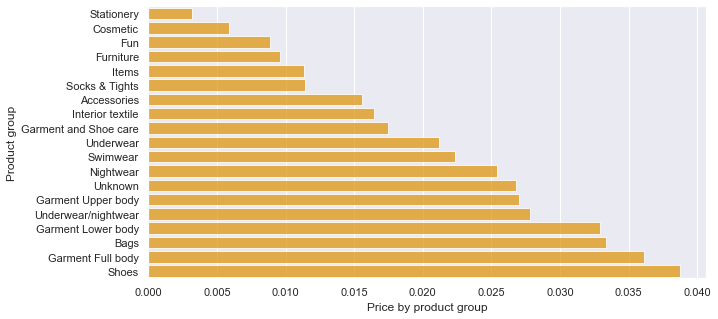

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

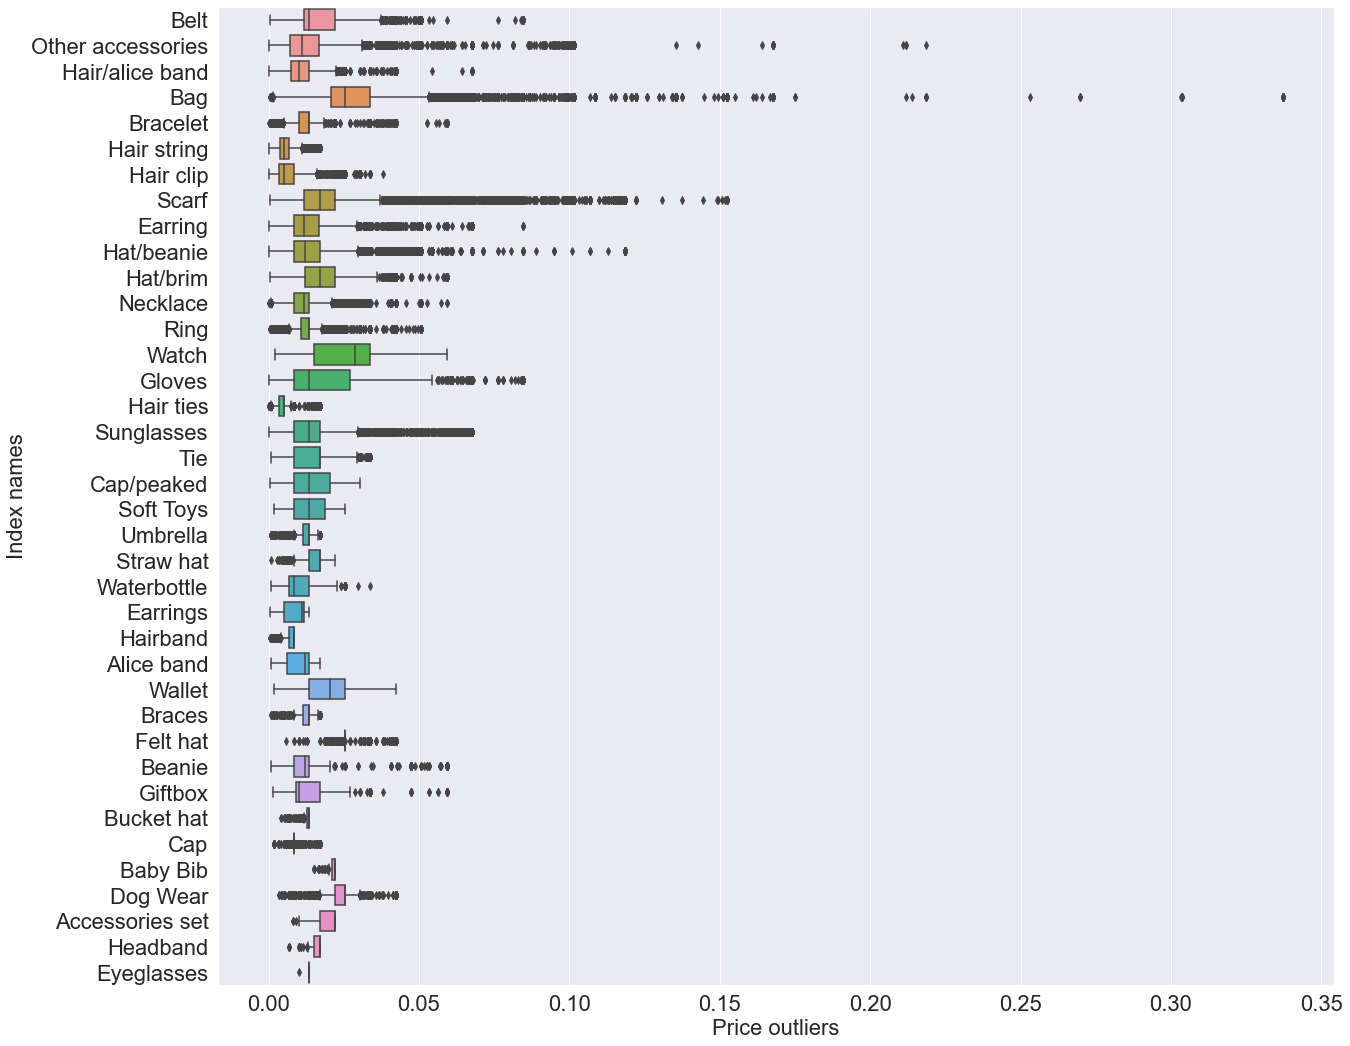

In [ ]:
accesories_group = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
f, ax = plt.subplots(figsize=(20,18))
ax = sns.boxplot(data=accesories_group, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize = 22)
ax.set_ylabel('Index names', fontsize = 22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
plt.show()

In [ ]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
articles_index = articles_index.sort_values('price')
articles_index

,price
index_name,
Baby Sizes 50-98,0.017512
Children Sizes 92-140,0.017517
"Children Accessories, Swimwear",0.017576
Lingeries/Tights,0.020801
Children Sizes 134-170,0.021873
Ladies Accessories,0.024032
Divided,0.026515
Menswear,0.027507
Sport,0.028775


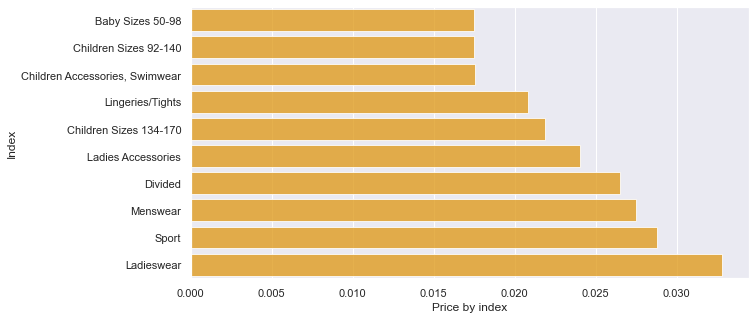

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

In [ ]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])
articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == 'Shoes']
series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean()
series_mean

,price
t_dat,
2018-09-30,0.043410
2018-10-31,0.041677
2018-11-30,0.045515
2018-12-31,0.044249
2019-01-31,0.043788
2019-02-28,0.040505
2019-03-31,0.040172
2019-04-30,0.037547
2019-05-31,0.036586


In [ ]:
series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
series_std

,price
t_dat,
2018-09-30,0.027695
2018-10-31,0.026785
2018-11-30,0.026538
2018-12-31,0.027727
2019-01-31,0.027141
2019-02-28,0.023152
2019-03-31,0.020108
2019-04-30,0.019923
2019-05-31,0.020153


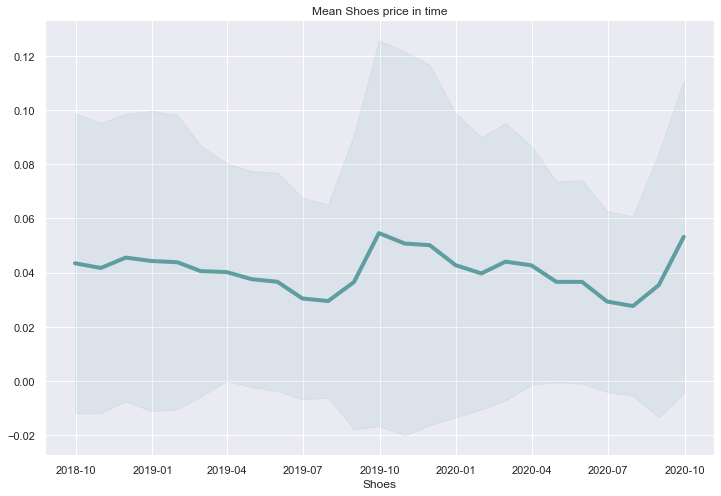

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12, 8))

ax.plot(series_mean, linewidth=4, color='cadetblue')
ax.fill_between(series_mean.index,
               (series_mean.values - 2*series_std.values).ravel(),
               (series_mean.values + 2*series_std.values).ravel(),
               color='cadetblue', alpha=.1)

ax.set_title(f'Mean Shoes price in time')
ax.set_xlabel('month')
ax.set_xlabel(f'Shoes');

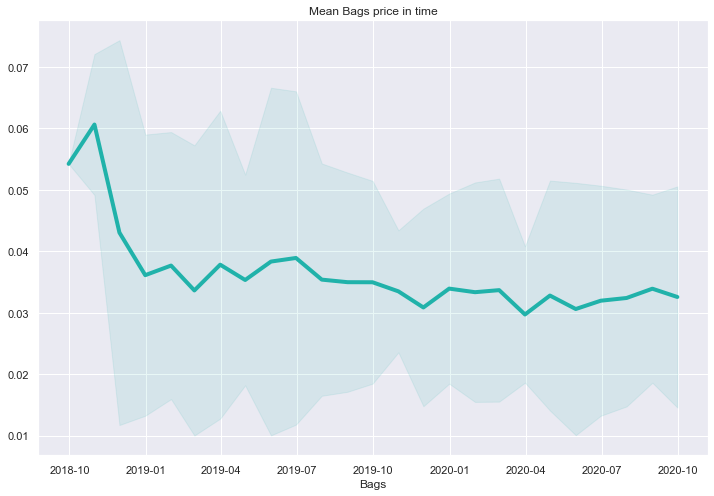

In [ ]:
articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == 'Bags']
series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean()
series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)

f, ax = plt.subplots(1,1, figsize=(12, 8))

ax.plot(series_mean, linewidth=4, color='lightseagreen')
ax.fill_between(series_mean.index,
               (series_mean.values-2*series_std.values).ravel(),
               (series_mean.values+2*series_std.values).ravel(),
               color='lightseagreen', alpha=.1)

ax.set_title(f'Mean Bags price in time')
ax.set_xlabel('month')
ax.set_xlabel(f'Bags');

In [ ]:
df_transactions['customer_id_cat'] = df_transactions.customer_id.astype('category')
df_transactions.customer_id_cat.unique()

['000058a12d5b43e67d225668fa1f8d618c13dc232df0c..., '00007d2de826758b65a93dd24ce629ed66842531df669..., '00083cda041544b2fbb0e0d2905ad17da7cf1007526fb..., '0008968c0d451dbc5a9968da03196fe20051965edde74..., '000aa7f0dc06cd7174389e76c9e132a67860c5f65f970..., ..., 'fe99a0069d6b3c64c2707d0ce53b9311540917471d82d..., 'fecc5f77b5f7ee4570efde9ab05ec94d0de2bf80efb4f..., 'fece2f68864c311a0b5208e2eb735b3dcde7e41461d32..., 'fee56cc5315dafb35a4490ccc6f711092cae913550c83..., 'ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a7851...]
Length: 1362281
Categories (1362281, object): ['00000dbacae5abe5e23885899a1fa44253a17956c6d1c..., '0000423b00ade91418cceaf3b26c6af3dd342b51fd051..., '000058a12d5b43e67d225668fa1f8d618c13dc232df0c..., '00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd..., ..., 'ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab..., 'ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a..., 'ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe3..., 'ffffd9ac14e89946416d80e791d064701994755c3ab68...]

In [ ]:
customer_ids_1k = df_transactions['customer_id_cat'].unique()[:1000]
customer_dict = {id: i for i, id in enumerate(customer_ids_1k)}
len(customer_dict)

1000

In [ ]:
transactions_small = df_transactions[df_transactions['customer_id_cat'].isin(customer_ids_1k)].copy()
transactions_small.head()

,t_dat,customer_id,article_id,price,sales_channel_id,customer_id_cat
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,00007d2de826758b65a93dd24ce629ed66842531df6699...


In [ ]:
tqdm.pandas()

def replace(x):
    try:
        res = customer_dict[x.customer_id_cat]
    except Exception as e:
        print(e)
        res = -1
    return res


transactions_small['customer_id'] = transactions_small.progress_apply(replace, axis=1)
transactions_small.head()

100%|█████████████████████████████████████████████████████████████████████████| 72374/72374 [00:02<00:00, 25503.28it/s]


,t_dat,customer_id,article_id,price,sales_channel_id,customer_id_cat
0,2018-09-20,0,663713001,0.050831,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
1,2018-09-20,0,541518023,0.030492,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
2,2018-09-20,1,505221004,0.015237,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
3,2018-09-20,1,685687003,0.016932,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
4,2018-09-20,1,685687004,0.016932,2,00007d2de826758b65a93dd24ce629ed66842531df6699...


In [ ]:
transactions_small['customer_id'].value_counts()

218    1157
990    1059
379     756
566     652
988     572
       ... 
155       1
382       1
432       1
22        1
712       1
Name: customer_id, Length: 1000, dtype: int64

In [ ]:
grouped = transactions_small.groupby(['customer_id', 'article_id']).count()['sales_channel_id']
grouped

customer_id  article_id
0            351484002     2
             541518023     1
             578020002     1
             663713001     2
             723529001     1
                          ..
999          861121001     1
             861847005     1
             862167002     2
             863000005     1
             863001001     1
Name: sales_channel_id, Length: 60252, dtype: int64

In [ ]:
customer_item_matrix = grouped.unstack('article_id')
customer_item_matrix

article_id,108775015,108775044,108775051,110065001,110065011,111565001,111586001,111593001,111609001,116379047,...,941005001,942064001,942187001,944506001,946282001,946748003,946748004,947060001,947509001,949198001
customer_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
customer_item_matrix.shape

(1000, 28632)

In [ ]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.head()

article_id,108775015,108775044,108775051,110065001,110065011,111565001,111586001,111593001,111609001,116379047,...,941005001,942064001,942187001,944506001,946282001,946748003,946748004,947060001,947509001,949198001
customer_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(customer_item_matrix, customer_item_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.01173631],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.01173631, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim)

cosine_sim_df.columns = customer_item_matrix.index

cosine_sim_df['customer_id'] = customer_item_matrix.index
cosine_sim_df = cosine_sim_df.set_index('customer_id')

cosine_sim_df.head()

customer_id,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
customer_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.122628,0.000000,0.0,0.000000
1,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.015052,0.0,0.012208,0.0,0.0,0.0,0.000000,0.000000,0.0,0.011736
2,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.008229,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.0,0.0,1.000000,0.022076,0.000000,0.0,0.021487,0.0,0.000000,...,0.010455,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.022076,1.000000,0.026352,0.0,0.000000,0.0,0.043769,...,0.006578,0.0,0.000000,0.0,0.0,0.0,0.000000,0.056614,0.0,0.000000


In [ ]:
cosine_sim_df.loc[4].sort_values(ascending=False)

customer_id
4      1.000000
899    0.144338
460    0.117851
101    0.100000
972    0.092450
         ...   
363    0.000000
364    0.000000
365    0.000000
367    0.000000
999    0.000000
Name: 4, Length: 1000, dtype: float64

In [ ]:
A = customer_item_matrix.loc[4]
items_bought_by_A = A[A > 0].index.tolist()
items_bought_by_A

[377277001,
 501820043,
 553139001,
 589017001,
 607983004,
 631848002,
 640639001,
 663498003,
 664421002,
 671505001,
 674681001,
 676827002,
 680187001,
 680912006,
 680912009,
 685687002,
 692454002,
 693497001,
 700819006,
 706016001,
 706016002,
 706016003,
 713349001,
 717490002,
 728162001,
 733044001,
 743049002,
 748355006,
 758049001,
 758050001,
 758060001,
 758064001,
 796210001,
 851996001,
 868164002,
 903309001]

In [ ]:
B = customer_item_matrix.loc[899]
items_bought_by_B = B[B > 0].index.tolist()
items_bought_by_B

[595779011,
 705988005,
 708379004,
 713700001,
 718623005,
 746329003,
 758040001,
 758043001,
 758049001,
 758050001,
 758064001,
 758125001]

In [ ]:
items_to_recommend_to_A = set(items_bought_by_B) - set(items_bought_by_A)
items_to_recommend_to_A

{595779011,
 705988005,
 708379004,
 713700001,
 718623005,
 746329003,
 758040001,
 758043001,
 758125001}

In [ ]:
df_articles[df_articles['article_id'].isin(items_to_recommend_to_A)][['article_id', 'prod_name', 'product_type_name']]

,article_id,prod_name,product_type_name
21890,595779011,Offy sweater,Sweater
53880,705988005,Molly HW Ankle TRS,Trousers
54760,708379004,Simone,Top
56254,713700001,VERA LACE TOP,Blouse
58066,718623005,PHILIPPA SHIRT,Shirt
66030,746329003,Andy skirt,Skirt
69757,758040001,LS Emmy Padded Triangle Top,Bikini top
69758,758043001,LS Emmy Tanga,Swimwear bottom
69771,758125001,LS Sarong,Sarong
